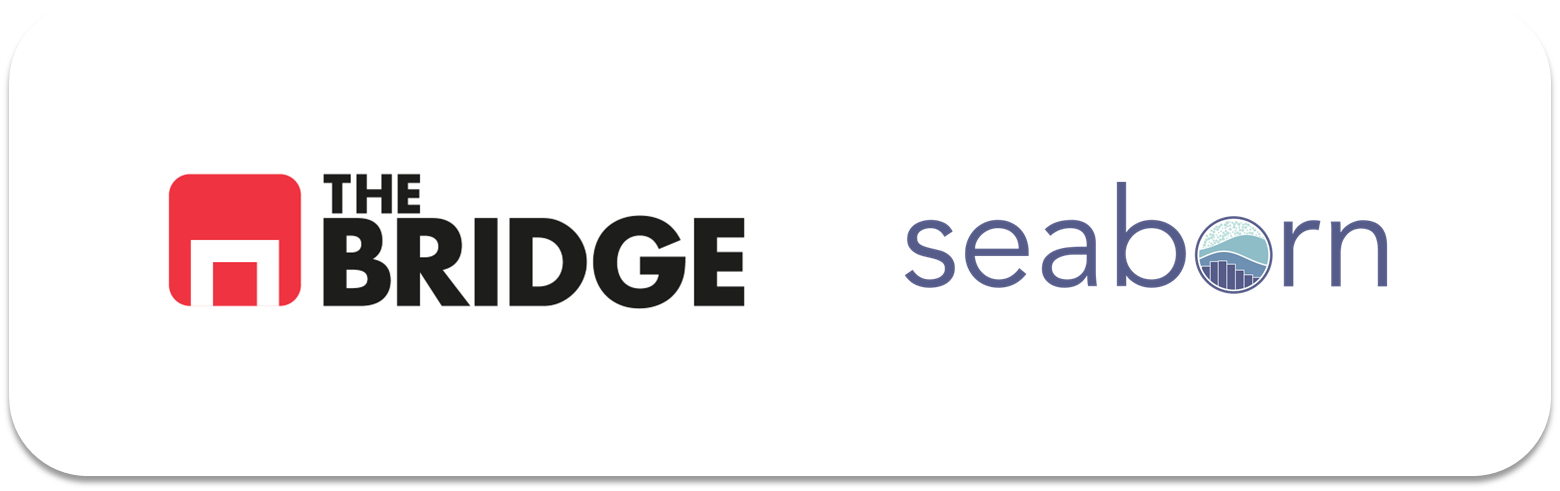

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [3]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
# Cargamos el dataset
df_california = pd.read_csv("./data/california_cities.csv")

# Mostramos el contenido del dataframe
df_california.head()

# Eliminar filas con valores nulos
df_california_cleaned = df_california.dropna()

# Mostramos el dataframe limpio
df_california_cleaned.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [4]:

def scatter_plot_with_size_and_color(df, col_x, col_y, col_categorical=None, size_col=None, scale=1, color_legend=True):
    """
    Función para crear un diagrama de dispersión con opciones de tamaño y color.
    
    df: DataFrame con los datos.
    col_x: Columna numérica para el eje X.
    col_y: Columna numérica para el eje Y.
    col_categorical: Columna categórica (opcional, valor por defecto None).
    size_col: Columna para controlar el tamaño de los puntos (opcional).
    scale: Escala para manipular el tamaño (opcional, valor por defecto 1).
    color_legend: Booleano que determina si se debe mostrar la leyenda de colores o tamaño.
    """
    
    if size_col:
        # Si se especifica la columna para el tamaño, escalamos los valores
        size = df[size_col] * scale
    else:
        size = 50  # Tamaño constante de los puntos
    
    if col_categorical:
        # Si se proporciona una columna categórica, la usamos para los colores
        sns.scatterplot(data=df, x=col_x, y=col_y, hue=col_categorical, size=size, sizes=(20, 200), palette="viridis")
    else:
        # Si no hay columna categórica, no usamos color
        sns.scatterplot(data=df, x=col_x, y=col_y, size=size, sizes=(20, 200), color='blue')

    # Si se requiere la leyenda
    if color_legend:
        plt.legend(title='Categorías', loc='best')
    
    plt.title(f'{col_y} vs {col_x}')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

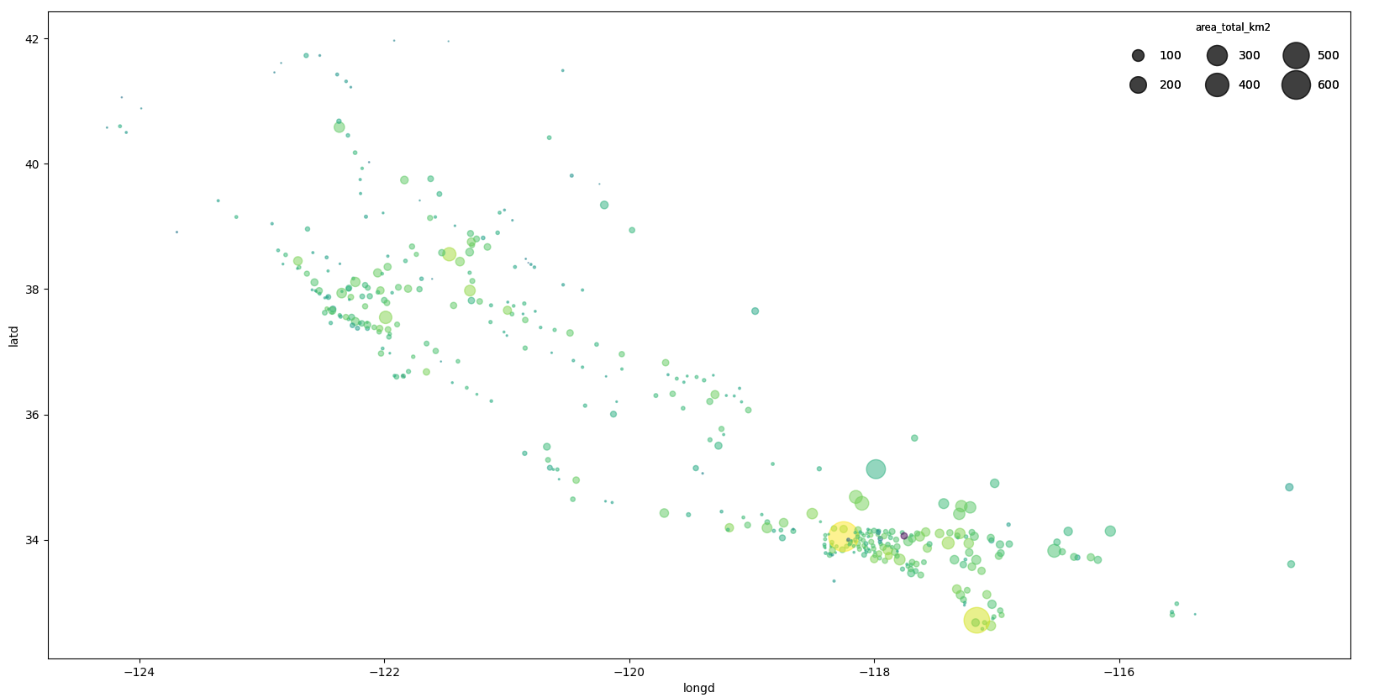

C:\Users\angel\AppData\Local\Temp\ipykernel_15212\1052459360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california_cleaned['log_poblacion'] = np.log10(df_california_cleaned['population_total'])


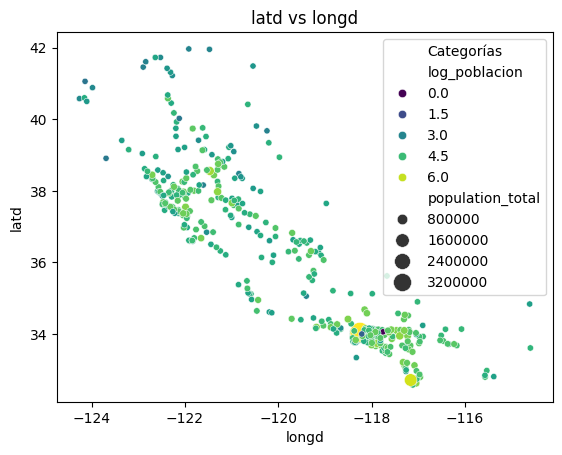

In [5]:
# Crear columna "log_poblacion"
df_california_cleaned['log_poblacion'] = np.log10(df_california_cleaned['population_total'])

# Usamos la función que creamos para pintar el gráfico
scatter_plot_with_size_and_color(df_california_cleaned, 'longd', 'latd', size_col='population_total', col_categorical='log_poblacion')


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [6]:
# Cargar el dataset del Titanic
df_titanic = pd.read_csv("./data/titanic.csv")

# Verificamos las primeras filas del dataset
df_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\angel\AppData\Local\Temp\ipykernel_15212\1837804950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_titanic, x='survived', palette='pastel')


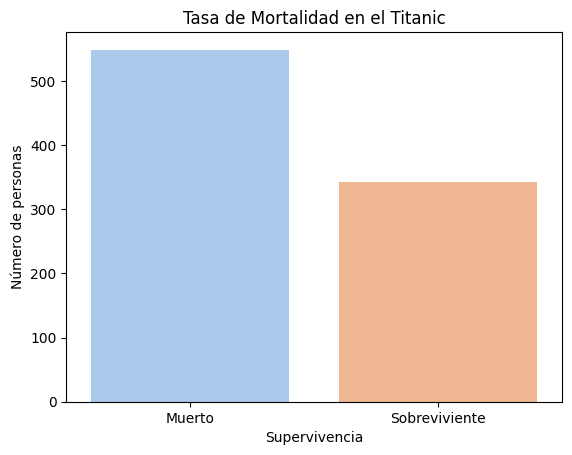

In [11]:
# Calculamos la tasa de mortalidad
df_titanic['survived'] = df_titanic['survived'].map({0: 'Muerto', 1: 'Sobreviviente'})

# Gráfico de tasa de mortalidad
sns.countplot(data=df_titanic, x='survived', palette='pastel')
plt.title('Tasa de Mortalidad en el Titanic')
plt.xlabel('Supervivencia')
plt.ylabel('Número de personas')
plt.show()




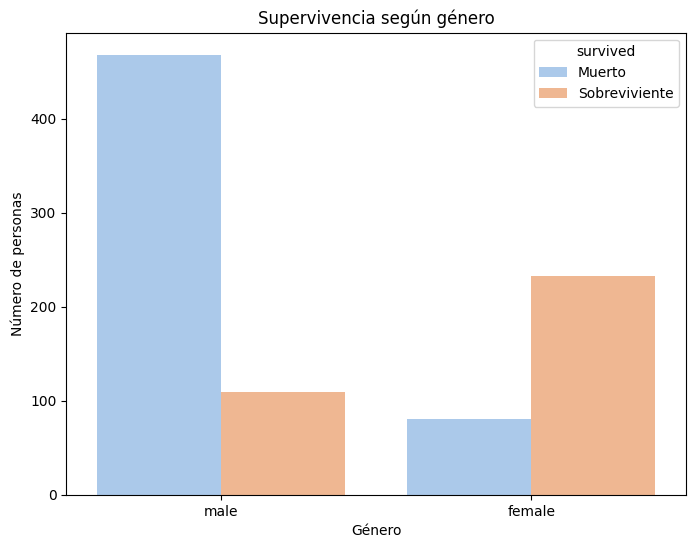

In [13]:
# Gráfico de supervivencia por género
plt.figure(figsize=(8,6))
sns.countplot(data=df_titanic, x='sex', hue='survived', palette='pastel')
plt.title('Supervivencia según género')
plt.xlabel('Género')
plt.ylabel('Número de personas')
plt.show()


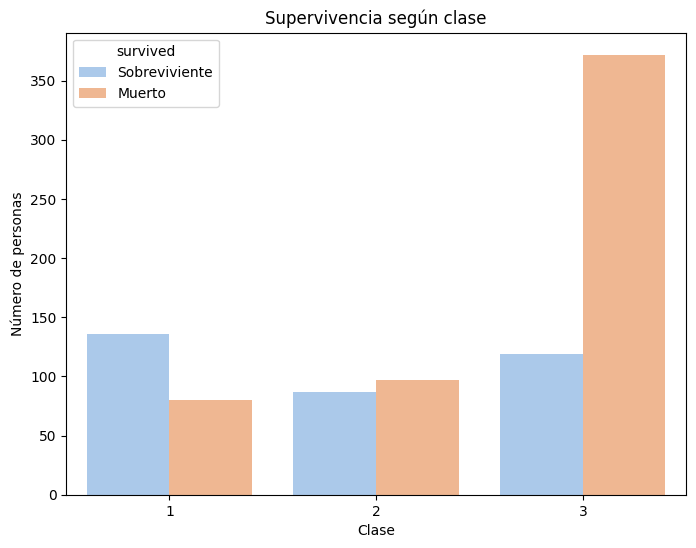

In [14]:
# Gráfico de supervivencia por clase
plt.figure(figsize=(8,6))
sns.countplot(data=df_titanic, x='pclass', hue='survived', palette='pastel')
plt.title('Supervivencia según clase')
plt.xlabel('Clase')
plt.ylabel('Número de personas')
plt.show()


C:\Users\angel\AppData\Local\Temp\ipykernel_15212\3537879175.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_titanic[df_titanic['is_woman_or_child'] == 'Mujer'], x='survived', palette='pastel')


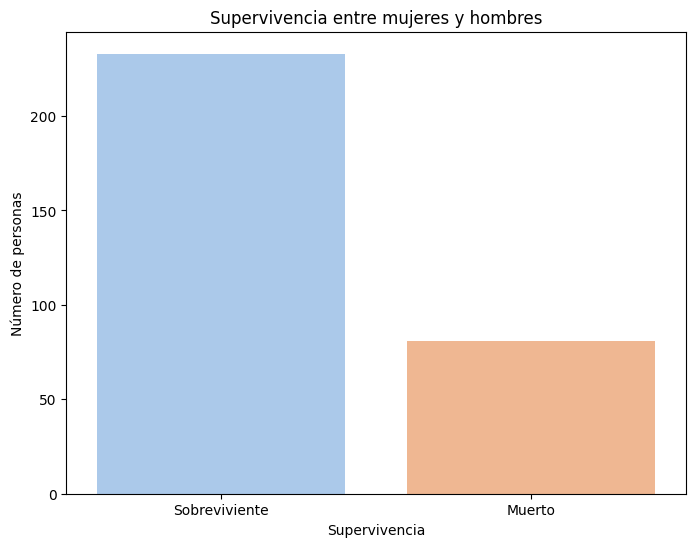

In [15]:
# Crear una nueva columna para distinguir mujeres y niños
df_titanic['is_woman_or_child'] = df_titanic['sex'].apply(lambda x: 'Mujer' if x == 'female' else 'Hombre')

# Gráfico de supervivencia entre mujeres y hombres
plt.figure(figsize=(8,6))
sns.countplot(data=df_titanic[df_titanic['is_woman_or_child'] == 'Mujer'], x='survived', palette='pastel')
plt.title('Supervivencia entre mujeres y hombres')
plt.xlabel('Supervivencia')
plt.ylabel('Número de personas')
plt.show()


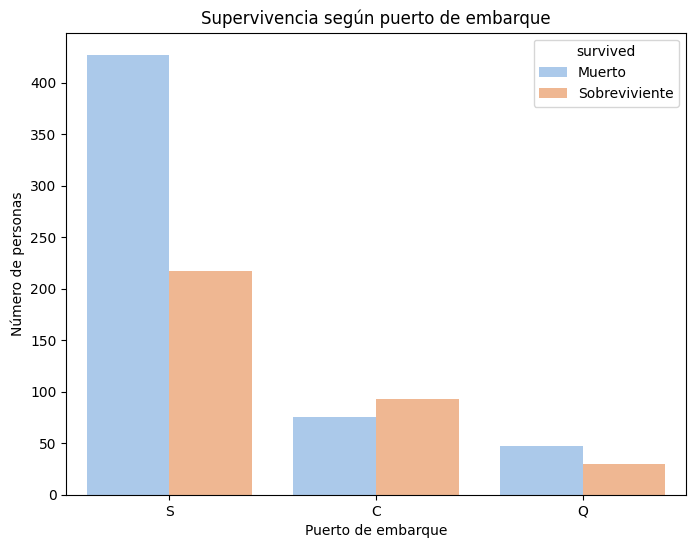

In [16]:
# Gráfico de supervivencia por puerto de embarque
plt.figure(figsize=(8,6))
sns.countplot(data=df_titanic, x='embarked', hue='survived', palette='pastel')
plt.title('Supervivencia según puerto de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Número de personas')
plt.show()
